# Gaussian Processes

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# build a kernel and a process-regressor
kernel = kernels.RBF(length_scale=100) + kernels.WhiteKernel(noise_level=0.01)
gp = GaussianProcessRegressor(kernel)

In [5]:
# build the field
xx, yy = np.mgrid[0:127:100j, 0:127:100j]
X = np.asarray([[_x, _y] for _x, _y in zip(xx.flatten(), yy.flatten())])
field = gp.sample_y(X, n_samples=1)

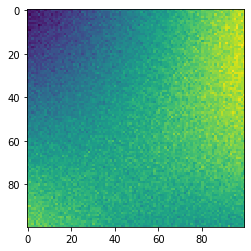

In [6]:
plt.imshow(field.reshape(100, 100))

## function

In [27]:
def get_random_field(grid_shape, kernel, n_samples=1):    
    r, c = grid_shape
    xx, yy = np.mgrid[0:r-1:r*1j, 0:c-1:c*1j]

    gp = GaussianProcessRegressor(kernel)
    X = np.asarray([[_x, _y] for _x, _y in zip(xx.flatten(), yy.flatten())])
        
    field = gp.sample_y(X, n_samples=n_samples)
        
    return field
    

In [28]:
f = get_random_field((20, 20), kernels.WhiteKernel(0.005) + kernels.RationalQuadratic(length_scale=5))

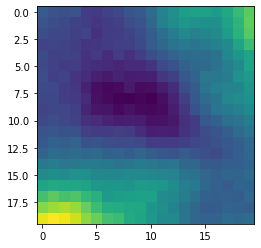

In [29]:
plt.imshow(f.reshape(20,20))

In [34]:
scales = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
levels = [0.001, 0.005, 0.01]

In [37]:
quad_fields = []
for scale in scales:
    for level in levels:
        quad_fields.append(get_random_field((30,30), kernels.WhiteKernel(level) + kernels.RationalQuadratic(length_scale=scale)))
print('Done.')

Done.


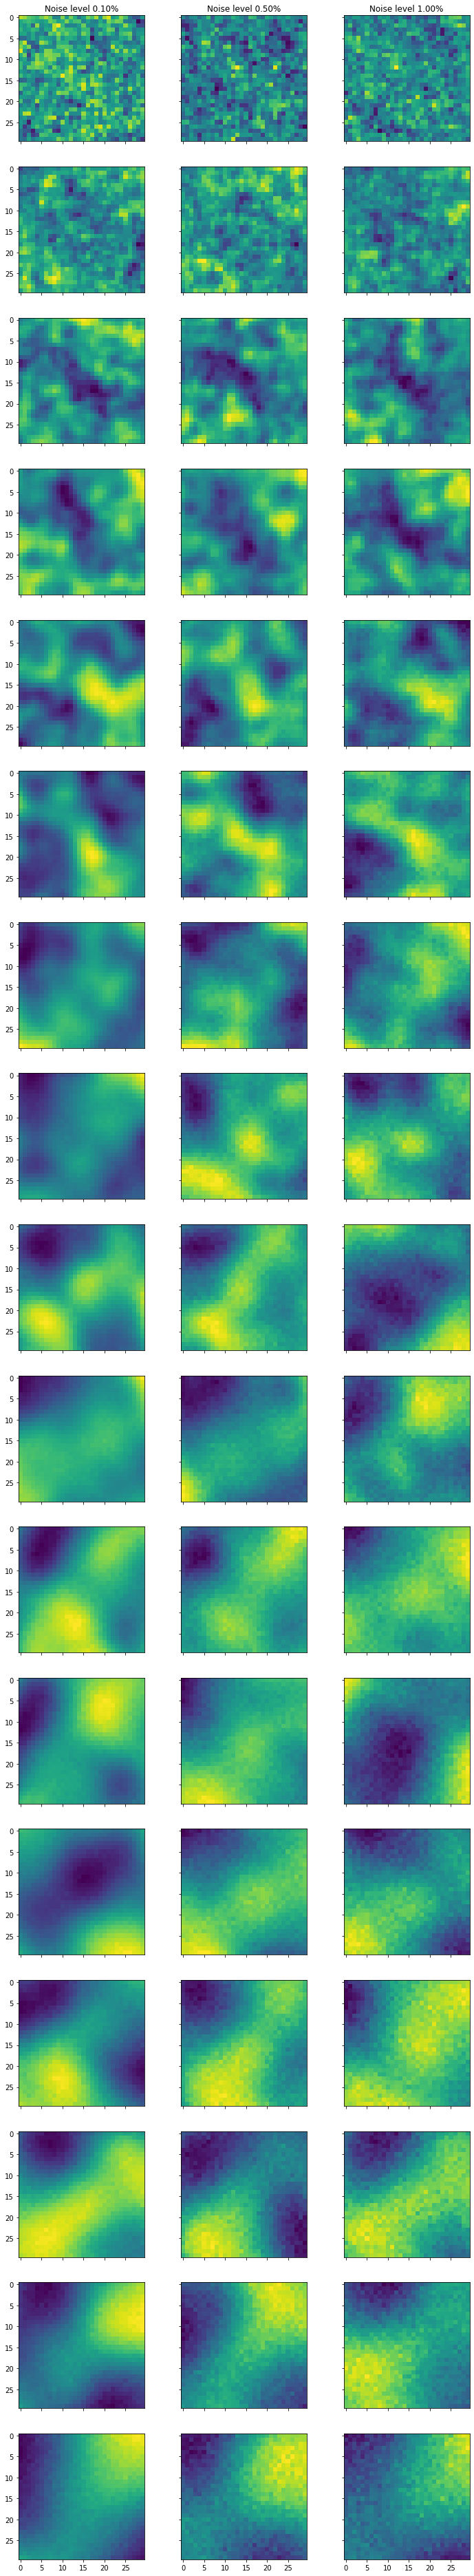

In [53]:
fig, _a = plt.subplots(len(scales), len(levels), figsize=(len(levels)*4, len(scales)*4), sharex=True, sharey=True)
axes = _a.flatten()

for i,f in enumerate(quad_fields):
    axes[i].imshow(f.reshape(30,30))

for ax,level in zip(axes[:3],levels):
    ax.set_title('Noise level %.2f%%' % (level * 100))
    
fig.savefig('quadratic_test.pdf')

In [51]:
exp_fields = []
for scale in scales:
    for level in levels:
        exp_fields.append(get_random_field((30,30), kernels.WhiteKernel(level) + kernels.ExpSineSquared(length_scale=scale, periodicity=15)))
print('Done.')

/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussia

Done.


/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/home/mirko/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


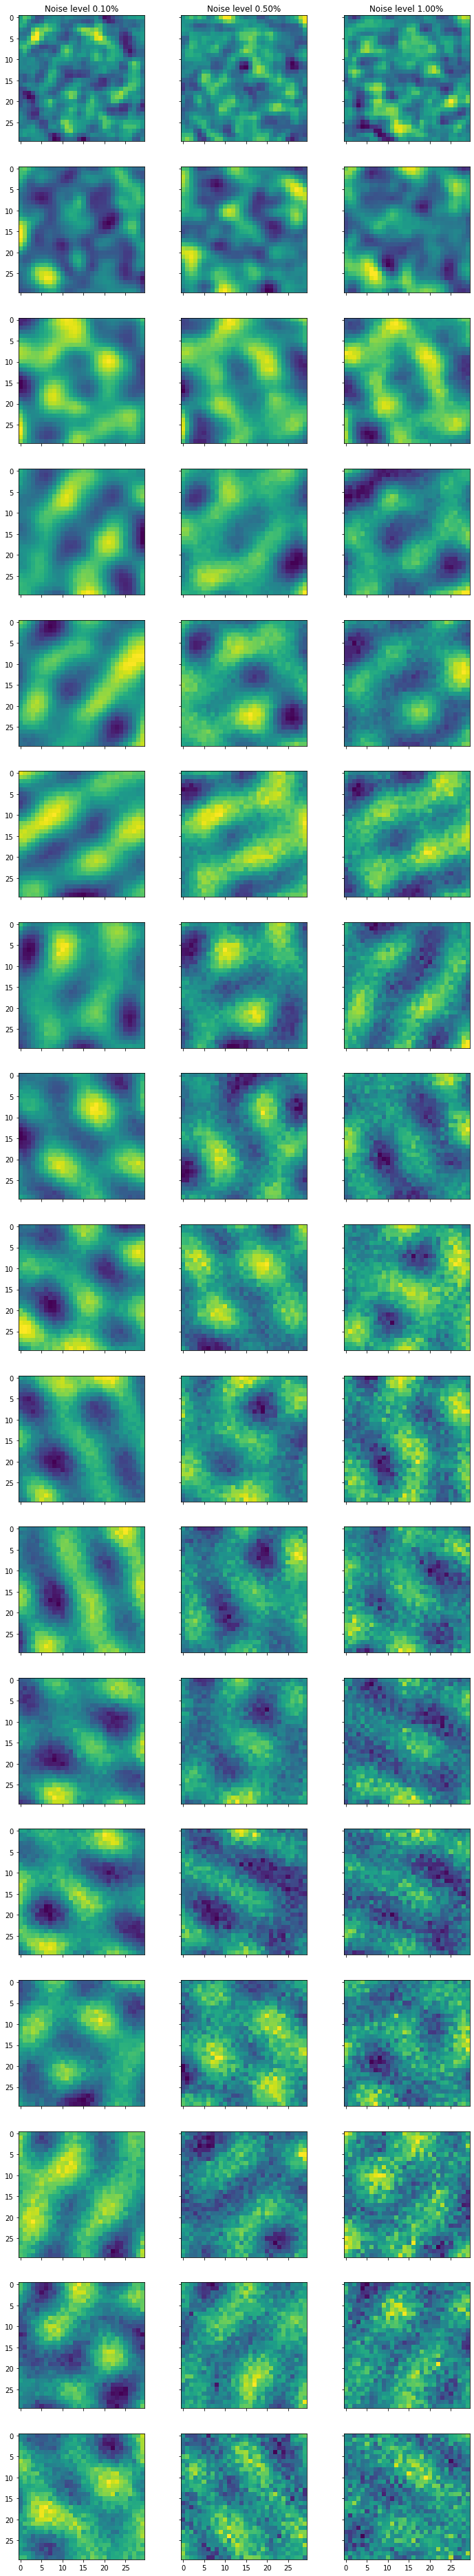

In [54]:
fig, _a = plt.subplots(len(scales), len(levels), figsize=(len(levels)*4, len(scales)*4), sharex=True, sharey=True)
axes = _a.flatten()

for i,f in enumerate(exp_fields):
    axes[i].imshow(f.reshape(30,30))

for ax,level in zip(axes[:3],levels):
    ax.set_title('Noise level %.2f%%' % (level * 100))
    
fig.savefig('sine_test.pdf')